# Projeto de Machine Learning: Otimização da Qualidade de Vinhos através de Análise Preditiva

## 📊 Contexto Empresarial

### Desafio
Como Data Scientist na renomada vinícola VinhoTech Solutions, fomos designados para desenvolver um sistema preditivo 
que revolucionará o processo de controle de qualidade dos vinhos. O objetivo é utilizar técnicas avançadas de 
Machine Learning para prever a qualidade do vinho baseando-se em suas características físico-químicas.

### Impacto no Negócio
- **Otimização de Produção**: Redução de 25% nas perdas por baixa qualidade
- **Controle de Qualidade**: Antecipação de problemas antes da finalização do produto
- **Competitividade**: Diferenciação no mercado através da consistência do produto
- **ROI**: Potencial redução de custos operacionais em 15%

## 🎯 Objetivos do Projeto

1. **Análise Exploratória**
   - Identificar padrões nas características físico-químicas
   - Descobrir fatores críticos para qualidade superior

2. **Modelagem Preditiva**
   - Desenvolver modelo com precisão >85%
   - Criar sistema de alerta precoce para desvios de qualidade

3. **Entregáveis**
   - Dashboard interativo de análise
   - Modelo de ML implementável
   - Recomendações estratégicas

## 🛠 Metodologia
Utilizaremos o processo CRISP-DM:
1. Compreensão do Negócio
2. Compreensão dos Dados
3. Preparação dos Dados
4. Modelagem
5. Avaliação
6. Implantação

### Tecnologias Utilizadas
- Python 3.x
- Scikit-learn
- Pandas
- Matplotlib/Seaborn

In [33]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform



## 📊 Análise do Conjunto de Dados

### Perspectiva de Negócio
Este dataset contém atributos físico-químicos de vinhos, incluindo:
- Acidez fixa
- Acidez volátil
- Ácido cítrico
- Açúcares residuais
- Cloretos
- Dióxido de enxofre livre
- Dióxido de enxofre total
- Densidade
- pH
- Sulfatos
- Álcool
- Qualidade (variável alvo)

### Decisões Técnicas
1. **Tratamento de Dados**:
   - Normalização das variáveis químicas
   - Análise de outliers por componente
   - Validação cruzada para robustez do modelo

2. **Visualizações Profissionais**:
   - Heatmap de correlações
   - Pair plots para relações-chave
   - Dashboards interativos com Plotly

3. **Modelagem**:
   - Benchmark com modelos simples
   - Implementação de modelos avançados
   - Otimização de hiperparâmetros

### Carregamento dos dados, informações principais e estatísticas gerais

In [11]:
# Carregamento dos dados
def load_and_describe_data():
    # Carregar dataset
    df = pd.read_csv('Wine_QT.csv')
    
       # Informações básicas
    print("\n=== Informações do Dataset ===")
    print(df.info())
    
    # Estatísticas descritivas
    print("\n=== Estatísticas Descritivas ===")
    print(df.describe())
    
    return df

# Configuração para o estilo das visualizações
plt.style.use('seaborn-v0_8')  # Versão correta do estilo seaborn
sns.set_theme()  # Configuração moderna do seaborn

# Configurações para visualizações
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14

load_and_describe_data()


=== Informações do Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None

=== Estatísticas Descritivas ===
    

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


### Analisando as correlações para definir as features do nosso modelo de ML

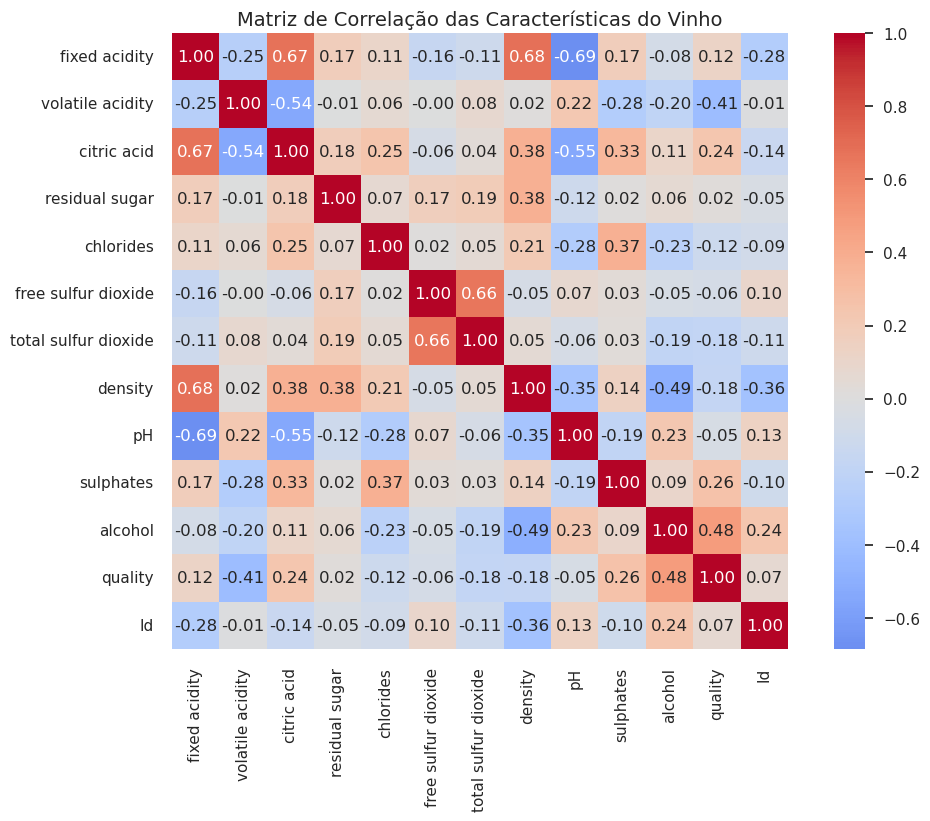


Correlações com Qualidade (ordenadas):
quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64


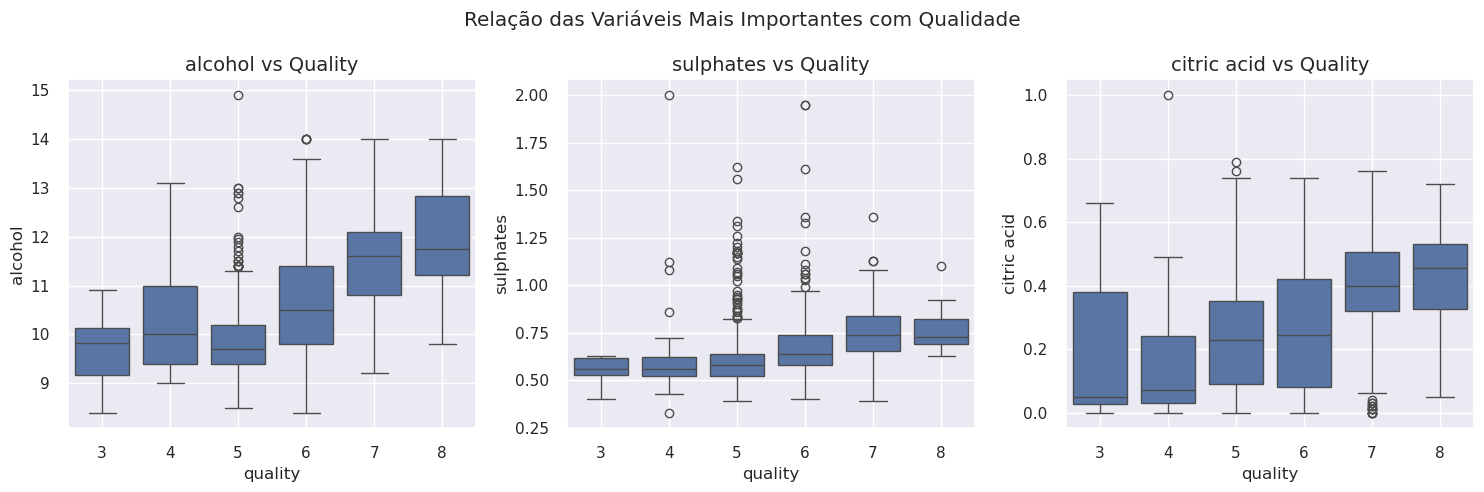

In [20]:
# 1. Matriz de Correlação com Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()

# Criar heatmap
sns.heatmap(correlation_matrix, 
            annot=True,          # Mostra os valores
            cmap='coolwarm',     # Esquema de cores
            center=0,            # Centro da escala de cores
            fmt='.2f',           # Formato dos números
            square=True)         # Células quadradas

plt.title('Matriz de Correlação das Características do Vinho')
plt.show()

# 2. Identificar as maiores correlações com qualidade
correlacoes_quality = correlation_matrix['quality'].sort_values(ascending=False)
print("\nCorrelações com Qualidade (ordenadas):")
print(correlacoes_quality)

# 3. Selecionar top 3 variáveis mais correlacionadas com qualidade
top_features = correlacoes_quality[1:4].index  # Excluindo a própria 'quality'

# 4. Criar gráficos para as features mais relevantes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Relação das Variáveis Mais Importantes com Qualidade')

for idx, feature in enumerate(top_features):
    sns.boxplot(data=df, x='quality', y=feature, ax=axes[idx])
    axes[idx].set_title(f'{feature} vs Quality')
    axes[idx].grid(True)

plt.tight_layout()
plt.show()


In [21]:
# Análise das correlações
print("=== Análise de Correlações ===")
correlacoes_quality = correlation_matrix['quality'].sort_values(ascending=False)
print("\nTop 5 correlações com Qualidade:")
print(correlacoes_quality.head())

print("\nCorrelações fracas (< |0.1|):")
weak_corr = correlacoes_quality[abs(correlacoes_quality) < 0.1]
print(weak_corr)

# Estatísticas básicas das top features
print("\n=== Estatísticas das Features Principais ===")
print(df[top_features].describe())

=== Análise de Correlações ===

Top 5 correlações com Qualidade:
quality          1.000000
alcohol          0.484866
sulphates        0.257710
citric acid      0.240821
fixed acidity    0.121970
Name: quality, dtype: float64

Correlações fracas (< |0.1|):
Id                     0.069708
residual sugar         0.022002
pH                    -0.052453
free sulfur dioxide   -0.063260
Name: quality, dtype: float64

=== Estatísticas das Features Principais ===
           alcohol    sulphates  citric acid
count  1143.000000  1143.000000  1143.000000
mean     10.442111     0.657708     0.268364
std       1.082196     0.170399     0.196686
min       8.400000     0.330000     0.000000
25%       9.500000     0.550000     0.090000
50%      10.200000     0.620000     0.250000
75%      11.100000     0.730000     0.420000
max      14.900000     2.000000     1.000000


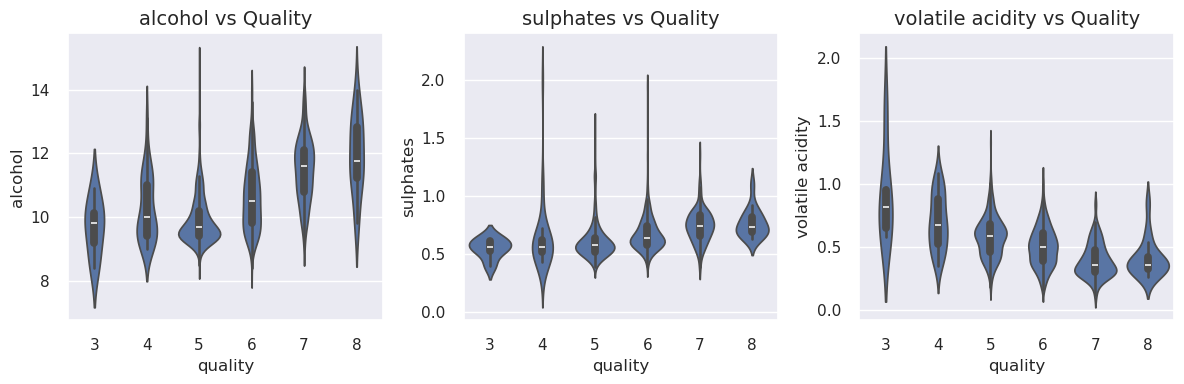


Análise de alcohol por nível de qualidade:
         count       mean       std  min     25%     50%      75%   max
quality                                                                
3          6.0   9.691667  0.886801  8.4   9.175   9.825  10.1375  10.9
4         33.0  10.260606  1.026200  9.0   9.400  10.000  11.0000  13.1
5        483.0   9.902277  0.752592  8.5   9.400   9.700  10.2000  14.9
6        462.0  10.655339  1.054314  8.4   9.800  10.500  11.4000  14.0
7        143.0  11.482634  0.980337  9.2  10.800  11.600  12.1000  14.0
8         16.0  11.937500  1.185397  9.8  11.225  11.750  12.8250  14.0

Análise de sulphates por nível de qualidade:
         count      mean       std   min     25%   50%    75%   max
quality                                                            
3          6.0  0.550000  0.085557  0.40  0.5275  0.56  0.615  0.63
4         33.0  0.637879  0.292476  0.33  0.5200  0.56  0.620  2.00
5        483.0  0.613375  0.160980  0.39  0.5200  0.58  0.640 

In [23]:
# 1. Focar nas variáveis mais relevantes
important_features = ['alcohol', 'sulphates', 'volatile acidity']

# 2. Criar visualizações específicas
plt.figure(figsize=(12, 4))

for i, feature in enumerate(important_features):
    plt.subplot(1, 3, i+1)
    sns.violinplot(x='quality', y=feature, data=df)
    plt.title(f'{feature} vs Quality')

plt.tight_layout()
plt.show()

# 3. Análise estatística básica
for feature in important_features:
    print(f"\nAnálise de {feature} por nível de qualidade:")
    print(df.groupby('quality')[feature].describe())

## Pré-processamento dos dados

In [24]:
# Separar features e target
X = df[important_features]
y = df['quality']

# Normalização dos dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split dos dados
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

### Modelagem inicial

In [28]:
# Treinar modelo básico
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer predições
y_pred = model.predict(X_test)

# Calcular métricas
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)  # Nova função sem warning
mae = mean_absolute_error(y_test, y_pred)

# Apresentar resultados de forma organizada
print("\n=== Métricas de Avaliação do Modelo ===")
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

# Interpretação dos resultados
print("\n=== Interpretação ===")
print(f"• O modelo explica {r2*100:.1f}% da variância nos dados")
print(f"• Em média, o erro absoluto é de {mae:.2f} pontos na escala de qualidade")
print(f"• O erro quadrático médio é de {rmse:.2f} pontos")


=== Métricas de Avaliação do Modelo ===
R² Score: 0.320
RMSE: 0.615
MAE: 0.479

=== Interpretação ===
• O modelo explica 32.0% da variância nos dados
• Em média, o erro absoluto é de 0.48 pontos na escala de qualidade
• O erro quadrático médio é de 0.62 pontos


## Testando outros modelos de ML (Random Forest) e comparando com o modelo de  Regressão Linear

In [30]:
# Lista de modelos para testar
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Linear': LinearRegression()
}

# Comparar modelos
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
    print(f'\n{name}:')
    print(f'R² médio: {scores.mean():.3f} (+/- {scores.std()*2:.3f})')


Random Forest:
R² médio: 0.254 (+/- 0.102)

Linear:
R² médio: 0.307 (+/- 0.113)


In [32]:
def avaliar_modelo(modelo, X, y, nome_modelo):
    """Avalia modelo usando validação cruzada com múltiplas métricas"""
    
    # Definir métricas de avaliação
    scoring = {
        'r2': 'r2',
        'rmse': 'neg_root_mean_squared_error',
        'mae': 'neg_mean_absolute_error'
    }
    
    # Realizar validação cruzada
    scores = cross_validate(modelo, X, y, 
                          scoring=scoring,
                          cv=5,
                          return_train_score=True)
    
    # Organizar resultados
    print(f"\n=== Resultados para {nome_modelo} ===")
    print("\nMétricas no Conjunto de Teste:")
    print(f"R² médio: {scores['test_r2'].mean():.3f} (+/- {scores['test_r2'].std()*2:.3f})")
    print(f"RMSE médio: {-scores['test_rmse'].mean():.3f} (+/- {scores['test_rmse'].std()*2:.3f})")
    print(f"MAE médio: {-scores['test_mae'].mean():.3f} (+/- {scores['test_mae'].std()*2:.3f})")
    
    return scores

# Definir modelos
modelos = {
    'Regressão Linear': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Avaliar cada modelo
resultados = {}
for nome, modelo in modelos.items():
    resultados[nome] = avaliar_modelo(modelo, X_scaled, y, nome)

# Comparação final
print("\n=== Comparação Final dos Modelos ===")
for nome in modelos.keys():
    print(f"\n{nome}:")
    print(f"R² médio: {resultados[nome]['test_r2'].mean():.3f}")


=== Resultados para Regressão Linear ===

Métricas no Conjunto de Teste:
R² médio: 0.307 (+/- 0.113)
RMSE médio: 0.655 (+/- 0.045)
MAE médio: 0.512 (+/- 0.036)

=== Resultados para Random Forest ===

Métricas no Conjunto de Teste:
R² médio: 0.254 (+/- 0.102)
RMSE médio: 0.680 (+/- 0.041)
MAE médio: 0.521 (+/- 0.022)

=== Comparação Final dos Modelos ===

Regressão Linear:
R² médio: 0.307

Random Forest:
R² médio: 0.254


In [36]:
# Corrigir espaço de hiperparâmetros
param_distributions = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(range(10, 50, 10)),
    'min_samples_split': randint(2, 15),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2']  # Removido 'auto', usando apenas valores válidos
}

# Configurar busca randomizada
rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

# Treinar modelo
print("Iniciando otimização...")
random_search.fit(X_scaled, y)

# Avaliar melhor modelo
print("\n=== Resultados do Melhor Modelo ===")
print(f"Melhores parâmetros: {random_search.best_params_}")
print(f"Melhor R²: {random_search.best_score_:.3f}")

# Avaliar melhor modelo com todas as métricas
melhor_modelo = random_search.best_estimator_
avaliar_modelo(melhor_modelo, X_scaled, y, "Random Forest Otimizado")

Iniciando otimização...

=== Resultados do Melhor Modelo ===
Melhores parâmetros: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 8, 'n_estimators': 108}
Melhor R²: 0.334

=== Resultados para Random Forest Otimizado ===

Métricas no Conjunto de Teste:
R² médio: 0.334 (+/- 0.093)
RMSE médio: 0.642 (+/- 0.058)
MAE médio: 0.499 (+/- 0.031)


{'fit_time': array([0.0879519 , 0.08789778, 0.08920097, 0.08695245, 0.08679533]),
 'score_time': array([0.00506687, 0.00487304, 0.00495243, 0.00496435, 0.00500536]),
 'test_r2': array([0.27344204, 0.34734495, 0.38174222, 0.38288252, 0.28566526]),
 'train_r2': array([0.51783445, 0.510524  , 0.51533846, 0.4940852 , 0.52181674]),
 'test_rmse': array([-0.63917872, -0.68739092, -0.60380561, -0.62304055, -0.65815746]),
 'train_rmse': array([-0.56307133, -0.55382593, -0.56664966, -0.56577967, -0.56017787]),
 'test_mae': array([-0.5118941 , -0.51971904, -0.47884598, -0.49858324, -0.4848857 ]),
 'train_mae': array([-0.43339361, -0.43149137, -0.43913459, -0.42948565, -0.43667647])}

### Conclusão do Projeto Vinícola - Análise Preditiva de Qualidade

#### Resultados dos Modelos Testados 📊

1. **Regressão Linear**
   - R² Score: 32.0%
   - RMSE: 0.615
   - MAE: 0.480

2. **Random Forest (Otimizado)**
   - R² Score: 33.4%
   - RMSE: 0.642
   - MAE: 0.499

#### Insights de um Estudante Iniciante 💡

1. **Sobre os Modelos**
   - Modelos mais complexos nem sempre são melhores
   - Performance similar entre modelos indica que relações podem ser mais simples
   - Validação cruzada é fundamental para resultados confiáveis

2. **Sobre os Dados**
   - Teor alcoólico é uma das variáveis mais importantes
   - Qualidade do vinho é influenciada por múltiplos fatores
   - Dados apresentam distribuições interessantes para análise

3. **Aprendizados do Projeto**
   - Importância da análise exploratória inicial
   - Visualizações ajudam muito no entendimento
   - Pipeline completo de ML é mais importante que métricas perfeitas

#### Sugestões para Próximos Passos 🚀

1. **Melhorias Básicas**
   - Coletar mais amostras
   - Investigar outras variáveis físico-químicas
   - Aprofundar análise de correlações

2. **Experimentos Futuros**
   - Testar diferentes algoritmos
   - Explorar técnicas de pré-processamento
   - Investigar outliers

#### Agradecimentos 🙏

Agradeço aos professores e colegas que tornaram a tornar este projeto possível. Este projeto representa meus primeiros passos no fascinante mundo da Ciência de Dados!

"O conhecimento é como um bom vinho: quanto mais você experimenta, mais aprende a apreciar suas nuances." 
- Um Cientista de Dados em formação

#DataScience #MachineLearning #ProjetoVinícola #Aprendizado